In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['font.size']=13

In [50]:
read1=pd.read_csv("country_wise_latest.csv")
read1


,Country_Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [3]:
read1.shape

(187, 15)

In [4]:
read1.isnull().sum()

Country_Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [52]:
read1.WHO_Region.value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East_Asia          10
Name: WHO_Region, dtype: int64

Here , provinc/state has numbers of null values , so we have to clean it.

In [53]:
read1.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [54]:
read1.columns

Index(['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO_Region'],
      dtype='object')

In [55]:
read1.tail()

,Country_Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [56]:
read1.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [57]:
new_var=['Country_Region','Deaths','Active','WHO_Region']
df=read1[new_var]

In [58]:
df

,Country_Region,Deaths,Active,WHO_Region
0,Afghanistan,1269,9796,Eastern Mediterranean
1,Albania,144,1991,Europe
2,Algeria,1163,7973,Africa
3,Andorra,52,52,Europe
4,Angola,41,667,Africa
...,...,...,...,...
182,West Bank and Gaza,78,6791,Eastern Mediterranean
183,Western Sahara,1,1,Africa
184,Yemen,483,375,Eastern Mediterranean
185,Zambia,140,1597,Africa


# Total Deaths In Different Regions Due To COVID-19

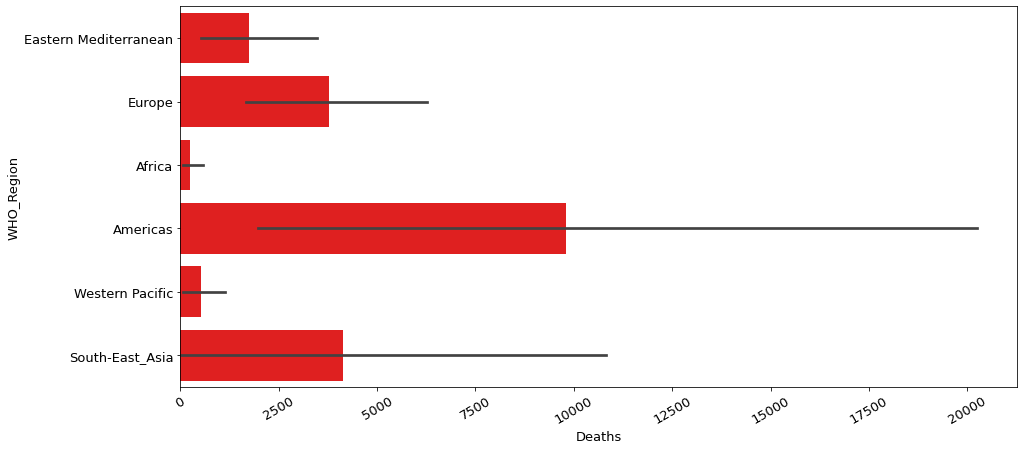

In [59]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=30)
sns.barplot(y='WHO_Region',x='Deaths',data=df,color='r')

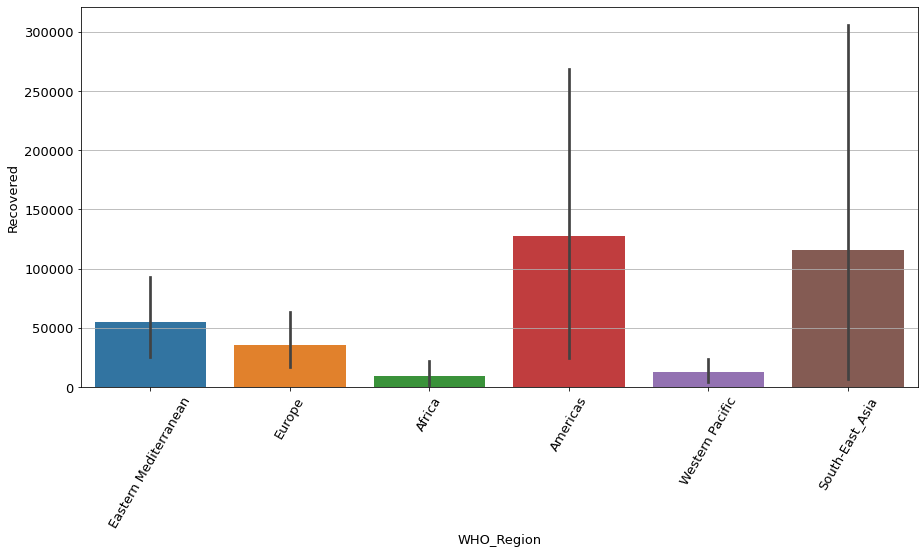

In [60]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.grid()
sns.barplot(x='WHO_Region',y='Recovered',data=read1)

# Country-Region's Analysis for those who belongs to South-East Asia Region

In [67]:
east=read1[['Country_Region','Deaths','Active','Recovered']]
region=read1.WHO_Region=='South-East_Asia'

In [68]:
Asia=east[region]
Asia_df=Asia.sort_values(by=['Recovered'],ascending=False)
Asia_df


,Country_Region,Deaths,Active,Recovered
79,India,33408,495499,951166
13,Bangladesh,2965,97577,125683
80,Indonesia,4838,37292,58173
119,Nepal,48,4950,13754
167,Thailand,58,128,3111
106,Maldives,15,807,2547
158,Sri Lanka,11,673,2121
27,Burma,6,52,292
19,Bhutan,0,13,86
168,Timor-Leste,0,24,0


So , Our Great India has Maximum Numbers Of Recovered People in South-East Asia Region

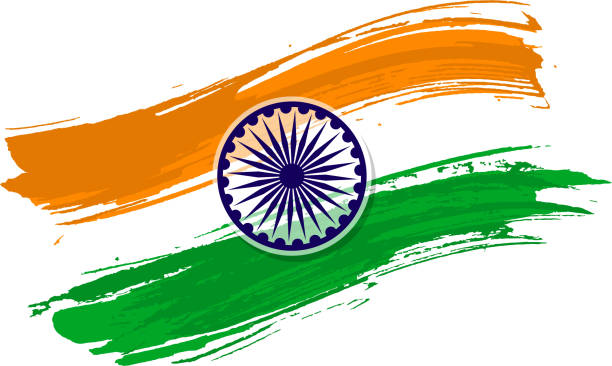

In [69]:
from IPython.display import Image
Image(filename='india.jpg')

In [61]:
read1.Country_Region.value_counts()

Ukraine                             1
Saint Vincent and the Grenadines    1
Bahrain                             1
Cuba                                1
Lesotho                             1
                                   ..
Comoros                             1
Algeria                             1
Montenegro                          1
Germany                             1
Chad                                1
Name: Country_Region, Length: 187, dtype: int64

# Total Deaths, Recovered,Active Cases in Brazil

In [46]:
basic=read1[['Country_Region','Deaths','Active','Recovered']]
reg=read1.Country_Region=='Brazil'

In [47]:
reg_df=basic[reg]
new_reg=reg_df.sort_values(by=['Deaths'])
new_reg

,Country_Region,Deaths,Active,Recovered
23,Brazil,87618,508116,1846641


# Country-Region's Analysis for those who belongs to Africa Region

In [48]:
fetch=read1.WHO_Region=='Africa'

In [49]:
fet_df=basic[fetch]
new_fetch=fet_df.sort_values(by=['Recovered'],ascending=False)
new_fetch

,Country_Region,Deaths,Active,Recovered
154,South Africa,7067,170537,274925
66,Ghana,168,3655,29801
2,Algeria,1163,7973,18837
124,Nigeria,860,22117,18203
31,Cameroon,391,2180,14539
42,Cote d'Ivoire,96,5198,10361
90,Kenya,285,9857,7833
146,Senegal,194,3093,6477
58,Ethiopia,228,7933,6386
103,Madagascar,91,3339,6260
